In [1]:
import yfinance as yf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def symbol_to_path(symbol, base_dir="Data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

        
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    rm = values.rolling(window).mean()
    return rm


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    rstd = values.rolling(window).std()
    return rstd


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (rstd * 2)
    lower_band = rm - (rstd * 2)  
    return upper_band, lower_band


In [3]:
spy = yf.Ticker('SPY')

spy = spy.history(period='max')

spy

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.959140,24.959140,24.834965,24.941401,1003200,0.000,0.0,0.0
1993-02-01 00:00:00-05:00,24.959119,25.118773,24.959119,25.118773,480500,0.000,0.0,0.0
1993-02-02 00:00:00-05:00,25.101040,25.189736,25.047822,25.171997,201300,0.000,0.0,0.0
1993-02-03 00:00:00-05:00,25.207492,25.455842,25.189753,25.438103,529400,0.000,0.0,0.0
1993-02-04 00:00:00-05:00,25.526801,25.597758,25.242973,25.544540,531500,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,445.379011,446.953444,443.824497,444.422363,67565400,0.000,0.0,0.0
2023-09-13 00:00:00-04:00,444.651563,446.136316,443.515555,444.940552,60199300,0.000,0.0,0.0
2023-09-14 00:00:00-04:00,447.491564,449.494479,446.146303,448.777008,83430800,0.000,0.0,0.0


In [4]:
df = spy['Close']

df

Date
1993-01-29 00:00:00-05:00     24.941401
1993-02-01 00:00:00-05:00     25.118773
1993-02-02 00:00:00-05:00     25.171997
1993-02-03 00:00:00-05:00     25.438103
1993-02-04 00:00:00-05:00     25.544540
                                ...    
2023-09-12 00:00:00-04:00    444.422363
2023-09-13 00:00:00-04:00    444.940552
2023-09-14 00:00:00-04:00    448.777008
2023-09-15 00:00:00-04:00    443.369995
2023-09-18 00:00:00-04:00    443.630005
Name: Close, Length: 7714, dtype: float64

Text(0.5, 1.0, 'Stock Prices')

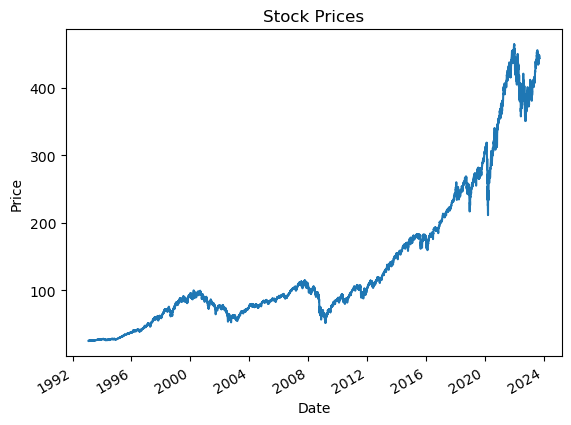

In [5]:
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')

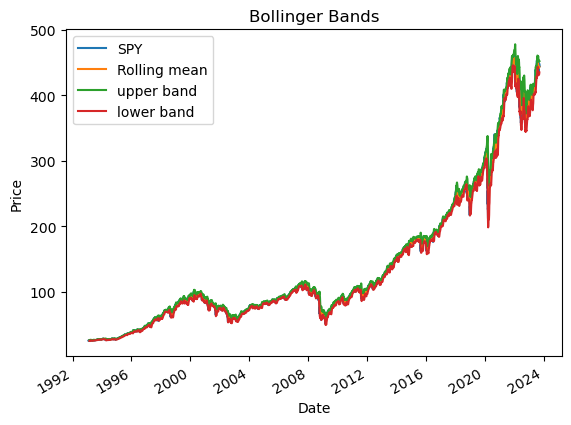

In [6]:
#df = df['SPY']

def test_run():
    # Read data
    #dates = pd.date_range('2012-01-01', '2012-12-31')
    #symbols = ['SPY']
    #df = get_data(symbols, dates)
    
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df, window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df, window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df.plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    #ax.set_xlim('2023-09-01 00:00:00-04:00', '2023-09-11 00:00:00-04:00')
    #ax.set_ylim([250, 350])
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    
    test_run()